In [729]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from lmfit.models import QuadraticModel, LorentzianModel
from lmfit import Model
import math
import uncertainties as unc
from numpy import exp


datain = pd.read_csv('in.csv')
dataout1 = pd.read_csv('out1.csv')
dataout2 = pd.read_csv('out2.csv')
dataout3 = pd.read_csv('out3.csv')


# fit ODMR data

## fit the first peak first

In [730]:
# def pair(x, s1, s2, s3, s4, sigma, amp11, amp12, amp21, amp22, amp31, amp32, amp41, amp42):
#     return 1- ((amp11*math.exp(-(x-(2.878-s1))**2/(2*sigma**2)) \
#                 + amp12*math.exp(-(x-(2.878+s1))**2/(2*sigma**2))\
#                 + amp21*math.exp(-(x-(2.878-s2))**2/(2*sigma**2))\
#                 + amp22*math.exp(-(x-(2.878+s2))**2/(2*sigma**2))\
#                 + amp31*math.exp(-(x-(2.878-s3))**2/(2*sigma**2))\
#                 +  amp32*math.exp(-(x-(2.878+s3))**2/(2*sigma**2))\
#                 +  amp41*math.exp(-(x-(2.878-s4))**2/(2*sigma**2))\
#                 + amp42*math.exp(-(x-(2.878+s4))**2/(2*sigma**2))\
#                 )/(sigma*math.sqrt(2*math.pi)))
def pair(x,zfs, s11, s12, s2, s3, s4, sigma1, sigma2, sigma3, sigma4,sigma5, sigma6, sigma7, sigma8, amp11, amp12, amp21, amp22, amp31, amp32, amp41, amp42):
    return (1- 
                ((sigma1/math.pi)*amp11/((x-(zfs-s11))**2+(sigma1**2)) \
                + (sigma8/math.pi)*amp12/((x-(zfs+s12))**2+(sigma8**2))\
                + (sigma2/math.pi)*amp21/((x-(zfs-s2))**2+(sigma2**2))\
                + (sigma7/math.pi)*amp22/((x-(zfs+s2))**2+(sigma7**2))\
                + (sigma3/math.pi)*amp31/((x-(zfs-s3))**2+(sigma3**2))\
                + (sigma6/math.pi)*amp32/((x-(zfs+s3))**2+(sigma6**2))\
                + (sigma4/math.pi)*amp41/((x-(zfs-s4))**2+(sigma4**2))\
                + (sigma5/math.pi)*amp42/((x-(zfs+s4))**2+(sigma5**2))))

In [731]:
# def bair(x, s1):
#     return (1- 2/s1*x)

In [732]:
model = Model(pair)
print(f'parameter names: {model.param_names}')
print(f'independent variables: {model.independent_vars}')

parameter names: ['zfs', 's11', 's12', 's2', 's3', 's4', 'sigma1', 'sigma2', 'sigma3', 'sigma4', 'sigma5', 'sigma6', 'sigma7', 'sigma8', 'amp11', 'amp12', 'amp21', 'amp22', 'amp31', 'amp32', 'amp41', 'amp42']
independent variables: ['x']


In [733]:
# modelb = Model(bair)

In [734]:
params = model.make_params(zfs = 2.875e9, s11 = 0.105e9, s12= 0.0875e9, s2 = 0.084e9, s3 = 0.028e9, s4 = 0.008e9, amp11 = 237511.279, amp12 = 51306, min=0,\
                           amp21 = 324462.149, amp22 = 209197.139, amp31 = 117247.147, amp32 = 51306, amp41 = 201736.894, amp42 =  209197.139,\
                            sigma1 = 5118679.32,sigma2 = 4571931,sigma3 = 5387519.00,sigma4 = 3907804.22,sigma5 = 4719244.90,sigma6 = 4571931,\
                                sigma7 = 4766224.28,sigma8 = 4078210.22,)
params['amp12'].set(value=51306, min=0)
model.set_param_hint('amp11', min=0)
model.set_param_hint('amp12', min=0)
model.set_param_hint('amp21', min=0)
model.set_param_hint('amp22', min=0)
model.set_param_hint('amp31', min=0)
model.set_param_hint('amp32', min=0)
model.set_param_hint('amp41', min=0)
model.set_param_hint('amp42', min=0)

y = np.array(dataout3['ydata'])
x = np.array(dataout3['xdata'])

result = model.fit(y, params, x=x)
print(result.fit_report())


[[Model]]
    Model(pair)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 512
    # data points      = 231
    # variables        = 22
    chi-square         = 1.4667e-04
    reduced chi-square = 7.0178e-07
    Akaike info crit   = -3252.30835
    Bayesian info crit = -3176.57516
    R-squared          = 0.96940637
[[Variables]]
    zfs:     2.8771e+09 +/- 120557.736 (0.00%) (init = 2.875e+09)
    s11:     1.0936e+08 +/- 219361.708 (0.20%) (init = 1.05e+08)
    s12:     79447977.3 +/- 265635.199 (0.33%) (init = 8.75e+07)
    s2:      88283049.2 +/- 164052.194 (0.19%) (init = 8.4e+07)
    s3:      28702502.9 +/- 380485.015 (1.33%) (init = 2.8e+07)
    s4:      10250071.4 +/- 120571.561 (1.18%) (init = 8000000)
    sigma1:  4702025.80 +/- 278584.559 (5.92%) (init = 5118679)
    sigma2:  4173740.51 +/- 170678.977 (4.09%) (init = 4571931)
    sigma3:  5382765.00 +/- 732299.357 (13.60%) (init = 5387519)
    sigma4:  3849638.07 +/- 269355.261 (7.00%) (init = 3907

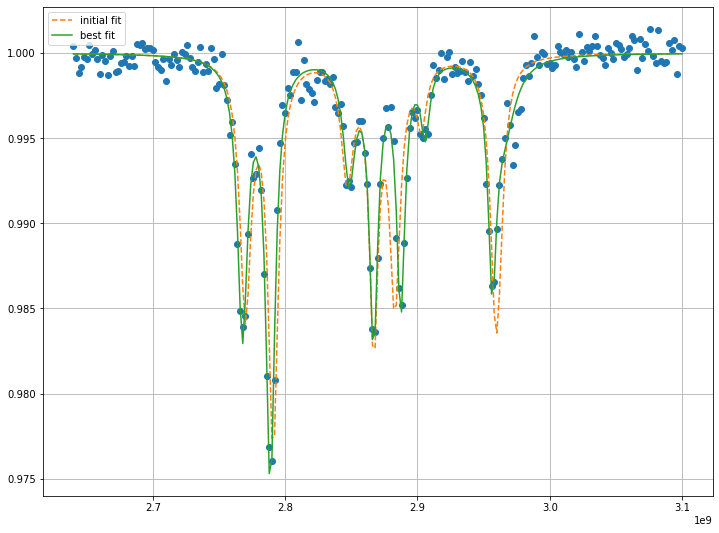

In [735]:
plt.figure(figsize=(12,9))
plt.grid()
plt.plot(x, y, 'o')
plt.plot(x, result.init_fit, '--', label='initial fit')
plt.plot(x, result.best_fit, '-', label='best fit')
plt.legend()
plt.show()

In [736]:
fit_x = np.linspace(2.62e9,3.12e9,2000)
fitlinein = resultin.eval(resultin.params, x = fit_x)
fitlineout1 = resultout1.eval(resultin.params, x = fit_x)
fitlineout2 = resultout2.eval(resultin.params, x = fit_x)
fitlineout3 = resultout3.eval(resultin.params, x = fit_x)
plt.figure(figsize=(12,9))
plt.grid()
plt.title('title')
plt.xlabel(r'x label')
plt.ylabel(r' y label')
# plot the data with errorbars, and to see the errorbars, we multiply it by 100
plt.plot(datain['xdata'], datain['ydata'],'o-',markersize = 2, label='Data in')
plt.plot(fit_x, fitlinein, '-',label = 'best-fit line')

plt.plot(dataout1['xdata'], dataout1['ydata'],'o-',markersize = 2, label='Data out1')
plt.plot(fit_x, fitlineout1, '-',label = 'best-fit line')

plt.plot(dataout2['xdata'], dataout2['ydata'],'o-',markersize = 2, label='Data out2')
plt.plot(fit_x, fitlineout2, '-',label = 'best-fit line')

plt.plot(dataout3['xdata'], dataout3['ydata'],'o-',markersize = 2, label='Data out3')
plt.plot(fit_x, fitlinein, '-',label = 'best-fit line')
plt.legend()

NameError: name 'resultin' is not defined

# final plot

NameError: name 'data' is not defined

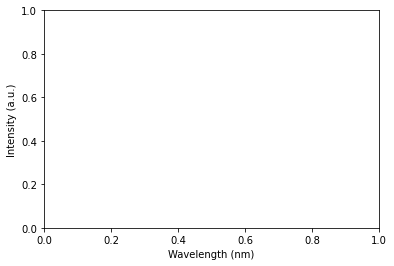

In [ ]:
# plt.rcParams.update({'font.size': 6})
# cm = 1/2.54 
# fig = plt.figure(figsize=(8.5*cm, 4*cm))
plt.xlabel(r'Wavelength (nm)')
plt.ylabel(r'Intensity (a.u.)')
# plot the data with errorbars, and to see the errorbars, we multiply it by 100
plt.plot(data['xdata'], data['ydata'],'o-C0',markersize = 3, label='30 um from center')
plt.plot(fit_x, fitline, '-C3',linewidth = 1, label = 'Fit Curve')
plt.legend()


plt.tight_layout()

# fig.savefig('in.eps', format= 'eps',transparent=True)